# Table of Contents
 <p>

In [35]:
%matplotlib notebook
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import glob
import os
from geopy.distance import vincenty

In [2]:
data_path = "/Users/jennavergeynst/Documents/Altusried/VPS_Test_Results_VEMCO/data/"

In [7]:
walls = pd.read_csv(data_path+'QGIS/studysite.csv')
test_pos = pd.read_csv(data_path+'fish-csv/all.csv', parse_dates=['Time'], infer_datetime_format=True)
# fixed_pos = pd.read_csv(data_path+'syncref-csv/all.csv', parse_dates=['Time'], infer_datetime_format=True)
gps_data = pd.read_csv(data_path+'Alle_GPS_tracks_10aug2017.csv', parse_dates=['time'], infer_datetime_format=True).sort_values(by='time').set_index('time')
Overview_coo_timing_range_test = pd.read_excel(data_path+'Overview_coördinates_and_timing_range_test_set_ups.xlsx', sheet_name='Thursday', skiprows=6)

In [8]:
def find_gps_coo(row):
    return gps_data.iloc[gps_data.index.get_loc(test_pos.Time[row], method='nearest')]

In [9]:
test_pos['LAT_GPS'] = [find_gps_coo(i).latitude for i in np.arange(len(test_pos))]
test_pos['LON_GPS'] = [find_gps_coo(i).longitude for i in np.arange(len(test_pos))]

test_pos['error'] = test_pos.apply(lambda row: vincenty((row.Latitude, row.Longitude), (row.LAT_GPS, row.LON_GPS)).m, axis=1)

In [21]:
Overview_coo_timing_range_test[Overview_coo_timing_range_test.Tag_position_track_code.isin(['TR'+str(n) for n in range(4,11)])]

,Timing_IN_hh:mm,Timing _OUT_hh:mm,Tag_position_track_code,Receiver_INBOcode,Tag_ID,Serial_number,Longitude,Latitude,Location_description,google_earth_file,Link_to_google_earth_file,Internal_tag_status,Logging_settings,Remarks
15,16:18:00,16:22:00,TR4,NaN,H170-1802-61995,NaN,NaN,NaN,Track by boat from up to downstream of the rec...,GPS_precise_tag_track_TR4.GPX,G:\Mijn Drive\busy_busy_busy\Projecten\FITHydr...,NaN,NaN,NaN
16,16:33:00,16:37:00,TR5,NaN,H170-1802-61995,NaN,NaN,NaN,Track by boat from up to downstream of the rec...,GPS_precise_tag_track_TR5.GPX,G:\Mijn Drive\busy_busy_busy\Projecten\FITHydr...,NaN,NaN,NaN
17,16:41:00,16:46:00,TR6,NaN,H170-1802-61995,NaN,NaN,NaN,Track by boat from up to downstream of the rec...,GPS_precise_tag_track_TR6.GPX,G:\Mijn Drive\busy_busy_busy\Projecten\FITHydr...,NaN,NaN,NaN
18,16:50:00,16:55:00,TR7,NaN,H170-1802-61995,NaN,NaN,NaN,Track by boat from up to downstream of the rec...,GPS_precise_tag_track_TR7.GPX,G:\Mijn Drive\busy_busy_busy\Projecten\FITHydr...,NaN,NaN,NaN
19,17:03:00,17:03:00,TR8,NaN,H170-1802-61995,NaN,NaN,NaN,Track by boat from up to downstream of the rec...,GPS_precise_tag_track_TR8.GPX,G:\Mijn Drive\busy_busy_busy\Projecten\FITHydr...,NaN,NaN,NaN
20,17:09:00,17:14:00,TR9,NaN,H170-1802-61995,NaN,NaN,NaN,Track by boat from up to downstream of the rec...,GPS_precise_tag_track_TR9.GPX,G:\Mijn Drive\busy_busy_busy\Projecten\FITHydr...,NaN,NaN,NaN
21,17:18:00,17:24:00,TR10,NaN,H170-1802-61995,NaN,NaN,NaN,Track by boat from up to downstream of the rec...,GPS_precise_tag_track_TR10.GPX,G:\Mijn Drive\busy_busy_busy\Projecten\FITHydr...,NaN,NaN,NaN


<IPython.core.display.Javascript object>


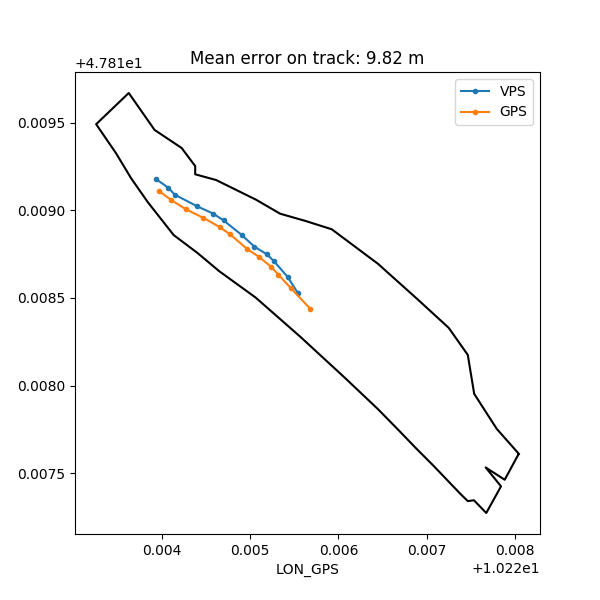

In [47]:
# onderstaande geeft enkel tracks als ik 2 uur aftrek van de uren gegeven in Overview

sub = test_pos.set_index('Time')['2017-08-10 14:18':'2017-08-10 14:22'] 

fig,ax = plt.subplots(figsize=(6,6))
walls.plot('x', 'y', c='black', ax=ax, label='')
sub.plot('Longitude', 'Latitude', ax=ax, label='VPS', marker='.')
sub.plot('LON_GPS', 'LAT_GPS', ax=ax, label='GPS', marker='.')
plt.legend()

ax.set_title('Mean error on track: {:.2f} m'.format(sub.error.mean()))